In [1]:
import inspect
from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.error import HTTPError
from urllib.error import URLError
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cyrillic_translit={'\u0410': 'A', '\u0430': 'a',
'\u0411': 'B', '\u0431': 'b',
'\u0412': 'V', '\u0432': 'v',
'\u0413': 'G', '\u0433': 'g',
'\u0414': 'D', '\u0434': 'd',
'\u0415': 'E', '\u0435': 'e',
'\u0416': 'Zh', '\u0436': 'zh',
'\u0417': 'Z', '\u0437': 'z',
'\u0418': 'I', '\u0438': 'i',
'\u0419': 'I', '\u0439': 'i',
'\u041a': 'K', '\u043a': 'k',
'\u041b': 'L', '\u043b': 'l',
'\u041c': 'M', '\u043c': 'm',
'\u041d': 'N', '\u043d': 'n',
'\u041e': 'O', '\u043e': 'o',
'\u041f': 'P', '\u043f': 'p',
'\u0420': 'R', '\u0440': 'r',
'\u0421': 'S', '\u0441': 's',
'\u0422': 'T', '\u0442': 't',
'\u0423': 'U', '\u0443': 'u',
'\u0424': 'F', '\u0444': 'f',
'\u0425': 'Kh', '\u0445': 'kh',
'\u0426': 'Ts', '\u0446': 'ts',
'\u0427': 'Ch', '\u0447': 'ch',
'\u0428': 'Sh', '\u0448': 'sh',
'\u0429': 'Shch', '\u0449': 'shch',
'\u042a': '"', '\u044a': '"',
'\u042b': 'Y', '\u044b': 'y',
'\u042c': "'", '\u044c': "'",
'\u042d': 'E', '\u044d': 'e',
'\u042e': 'Iu', '\u044e': 'iu',
'\u042f': 'Ia', '\u044f': 'ia'}
def transliterate(word, translit_table=cyrillic_translit):
    '''
    Takes a word and a transliterations dictionairy it translitarates the word
    
    Params :
        word :
        translit_table :
    Returns :
        converted_word :
    '''
    converted_word = ''
    for char in word:
        transchar = ''
        if char in translit_table:
            transchar = translit_table[char]
        else:
            transchar = char
        converted_word += transchar
    return converted_word

In [5]:
#"""
alphabet = 'АаБбВвГгДдЕеЁёЖжЗзИиЙйКкЛлМмНнОоПпРрСсТтУуФфХхЦцЧчШшЩщЪъЫыЬьЭэЮюЯя'
alphabet_upper = 'АБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ'
alphabet_lower='абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
#print(alphabet_lower)
def hist_data(diction, front='',maxlimit=10000):
    '''
    Takes a LIST of words and optionally the first letters of word that determine the sublist returned
    
    Params :
    
        diction(list) : List of words from which we want two draw a histogram of their starting letter.
        The words must be written with cyrillic alphabet. The user can choose to histogram acquire data f
        or the nth letter, given that he provides the former n-1 letters that should characterize the word
        
        front(string) : A string of n letters, existing in the begging of each word. If the user gives for 
        exampe the input 'зт' the functions for every letter of cyrilic alphabet, e.g. 'letter' , finds all
        the words in the diction(list) that start with the string 'зт'+letter.
        
    Returns :
        converted_word : A dictionairy of the starting substring, as a key and the frequency in which this
        substring initiates a word, as the value.
    '''
    new_dict_tmp  = {}
    for gramma in alphabet_lower:  
        letter_tmp = [(dicty) for dicty in loweraddsort(list(diction)) if dicty.startswith(front+gramma) is True]
        if len(letter_tmp) != 0:
            if len(letter_tmp) >maxlimit:
                
                tmp_dict = hist_data(diction, front=gramma,maxlimit=maxlimit)
                new_dict_tmp.update(tmp_dict)
            else:    
                new_dict_tmp[front+gramma]= len(letter_tmp)
        letter_tmp.clear()
    return new_dict_tmp#"""

In [6]:
#"""
def hist_data2(diction2):
    new_dict2_tmp  = {}
    grammata_tmp = []
    grammata3_tmp = []
    for gramma in alphabet_lower:  
        sum=[]
        new_dict3 = {}
        for gramma2 in alphabet_lower:
            tmp_list = []        
            letter2 = []
            for i in range(0,len(diction2)):
                if(diction2[i].startswith(gramma+gramma2)):
                    letter2.append(diction2[i])
            if len(letter2) != 0:
                tmp_list.append(letter2.copy())
                new_dict2_tmp[gramma+gramma2] = tmp_list.copy()
                sum.append(gramma+gramma2)
                new_dict3[gramma+gramma2]= len(letter2)
            letter2.clear()
            tmp_list.clear()
        grammata3_tmp.append(new_dict3)
        grammata_tmp.append(sum)
    return new_dict2_tmp, grammata_tmp,grammata3_tmp#"""

In [7]:
def loweraddsort(done):
    '''
    Takes a LIST of words, lowers all the letters and the sorts the list.
    
    Params :
    
        done(list) : List of words from which we want to lower and sort.
        
    Returns :
        done(list) : The list after the above mentioned transformations.
    '''
    for i in range(0,len(done)):
        done[i]=done[i].lower()    
    done = np.sort(done)
    return done
#print(*dictionairy, sep = '\n')

In [8]:
#%matplotlib tk
l=0                                                                           
def hist_plot(diction_tmp,a=1,saveName=str(l),rotate=0,sizing=10,figsize= (13,6)):
    plt.clf()
    fig, ax = plt.subplots(figsize = figsize)
    ax.bar(list(diction_tmp.keys()), diction_tmp.values(), \
        align='center',color='red', edgecolor = 'black')
    for index,data in enumerate(list(diction_tmp.values())):
        plt.text(x=index , y = (data+1) , s=f"{round(data/a, 1)}" ,\
             fontdict=dict(fontsize=sizing), horizontalalignment='center',\
             verticalalignment='baseline',rotation=rotate)
    plt.tight_layout()
    plt.xticks(rotation=rotate, ha='center',size=sizing+2)
    global l
    l+=1
    plt.savefig(saveName+'.jpg', format='jpg', dpi=1200)
    plt.show()#"""

In [9]:
grammataki = 7
grammata3 = {}
#%matplotlib tk
def plotty(gram=grammataki,grammat3=grammata3):
    #plt.clf()
    plt.figure(grammataki)
    fig, ax = plt.subplots(figsize = (15,5))
    ax.bar(list(grammat3[gram].keys()),\
       grammat3[gram].values(), \
        align='center',color='red', edgecolor = 'black')
    for index,data in enumerate(list(grammat3[gram].values())):
        plt.text(x=index , y =data+1 , s=f"{data}" , \
             fontdict=dict(fontsize=15), horizontalalignment='center'\
             ,verticalalignment='baseline')
    plt.title(alphabet_upper[gram])
    plt.tight_layout()
    plt.savefig(str(alphabet_upper[gram])+'.png')
    plt.show() #"""

In [10]:
#%matplotlib tk
def hist_big(big):
    plt.clf()
    fig, ax = plt.subplots(figsize = (20,20))
    ax.bar(list(big.keys()), big.values(), \
        align='center',color='red', edgecolor = 'black')
    ax.yaxis.labelpad = 20
    for index,data in enumerate(list(big.values())):
        plt.text(x = index,y=data+1 ,  s=f"{data}" ,\
             fontdict=dict(fontsize=5),\
             horizontalalignment='center',\
             verticalalignment='center')
    plt.tick_params(axis='x', which='major', labelsize=4)
    plt.tight_layout()
    plt.show()#"""

In [11]:
try:
 urlMain='http://www.wordcyclopedia.com'
 listLevels = np.asarray([ 'a1', 'a2', 'b1', 'b2', 'c1', 'c2'])
 url ='http://www.wordcyclopedia.com/russian/'
except HTTPError as e:
 print(e)
except URLError as e:
 print('The server could not be found!')
else:
 print('It Worked!')

It Worked!


In [12]:
sum = 0
for level in listLevels:
    html = urlopen(url + str(level))
    bs = BeautifulSoup\
     (html.read(),'html.parser')
 #Find all words for a level
    wordList_tmp = bs.find_all\
     ('a', {'class':'word'})
#transList_tmp = word.parent.find_all('span', {'class':'translation'})
    print(len(wordList_tmp))
    globals()[str(level)] = np.ndarray(shape = (3,len(wordList_tmp)) , dtype = object)
    #locals()[str(level)] = np.zeros(3,len(wordList_tmp))
    j = 0 
    for word in wordList_tmp:
    #print(word.get_text())
        transList_tmp = word.parent.find_all('span', {'class':'translation'})
    #print(transList_tmp)
        trans = []
        for item in transList_tmp:
            trans.append(item.get_text())
        globals()[str(level)][1][j]=\
        trans
        globals()[str(level)][0][j]=\
        word.get_text()
        globals()[str(level)][2][j]=\
        (urlMain+str(word.get('href')))
        j +=1
    sum += j

932
1056
1562
3422
1393
582


In [13]:
dictionairy = np.ndarray(shape = (sum,), dtype = object)
#print(dictionairy.shape)
t = 0
baby_dictionairy = np.ndarray(shape = (3550,), dtype = object)
for level in listLevels:
    for word in range(0,len(globals()[str(level)][0])):
        #print(globals()[str(level)][0][word])
        dictionairy[t] = globals()[str(level)][0][word]
        #print(dictionairy[t])
        if t<3550:
            baby_dictionairy[t] = globals()[str(level)][0][word]
            print(baby_dictionairy[t])
        t+=1
        


а
август
автобус
автомобиль
автор
адрес
адресат
азбука
азиатский
азия
актер
актриса
аллергия
алфавит
америка
американец
американский
английский
англичанин
анкета
апельсин
апрель
аптека
араб
арабский
артист
африка
африканский
аэропорт
бабушка
балет
банан
банк
банкомат
баскетбол
бассейн
бегать
бедный
бежать
без
беларусь
белоруссия
белорусский
белый
библиотека
билет
близкий
близко
блюдо
богатый
бок
болеть
боль
больница
больно
больной
больше
большой
ботинок
брат
брать
британский
бриться
брюки
буква
бумага
бутерброд
бутылка
быстро
быстрый
быть
в
важно
важный
ванна
ванная
ваш
вдова
вдовец
вежливо
вежливый
велосипед
верно
верх
весна
вечер
вещь
взрослый
вид спорта
видео
видеть
виза
вилка
вино
виноград
виски
включать
вкусный
внимание
внук
внучка
вода
водитель
водительские права
водка
возраст
волейбол
волос
вопрос
вопросительный
воровать
восемнадцать
восемь
восемьдесят
восемьсот
восклицательный
воскресенье
восток
вот
врач
время
время года
все
вторник
вход
входить
вчера
въезд
вы
выбирать
выезд
вы

дыня
дышать
единственный
ежегодный
ежедневный
ездить
елка
если
еще
еще не
жажда
жалко
жалюзи
жара
жареный
жарить
жаркий
желание
желать
железная дорога
железнодорожная станция
железнодорожный
жениться
животное
жир
жирный
жительство
журнал
за
за границей
забирать
заболеть
заворачивать
загадка
заглавие
заголовок
задний
зажигалка
заказывать
заканчивать
закрываться
закуска
зал
замерзать
замолчать
замороженный
замуж
занавеска
запах
запирать
записная книжка
записывать
запись
заплакать
запрещать
зарегистрироваться
зарплата
засмеяться
зачем
звезда
зверь
звонить
звонкий
звонок
звучать
здоровье
земля
земляк
зеркало
зимний
зло
знакомиться
зонт
зоопарк
зритель
зубная нить
играть роль
идти пешком
из-под
известный
извинение
извиняться
иногда
инструкция
интересный
интернет-магазин
интонация
искать
искать работу
исключение
искусство
исправлять
испугаться
кавычка
каждый
кажется
календарь
каникулы
капитан
картина
картинка
кастрюля
каталог
кафе
каша
кашель
кашлять
квадрат
квартплата
кидать
кинофильм
киоск

здание
здорово
злой
змея
знак препинания
знакомство
знакомый
знаменитый
знание
значение
зрение
зубной врач
зубрить
зять
и ... и
игровой
игрок
игрушка
идея
из-за
избиратель
избирательный
избирать
избрание
избранный
известие
известность
извинять
изложение
изменение
изменяться
измерять
изучать
изучение
иисус христос
или ... или
иллюстрация
иметь право
иметься
инженер
инструктор
инструмент
интервью
интерес
интересовать
интересоваться
интернет-кафе
интернет-страница
интимный
информация
исключать
искусственный
ислам
исламский
использовать
испортить
испортиться
испорченный
испуг
испытывать
испытывать боль
испытывать жажду
испытывать стресс
история
источник
иудаизм
иудей
йога
к сожалению
кабинет
каблук
кадр
казино
как будто
как-то
какой-нибудь
какой-то
камера
канал
карман
карта памяти
карьера
катастрофа
кататься
каток
качественный
качество
квас
квитанция
кивать
кипеть
кипятить
кисть
клавиатура
клавиша
классик
классика
классический
классный
клеить
клей
клеящая лента
клиент
климат
клип
клоун
ког

этикетка
эффективный
юбилей
южный
юзер
юный
юридический
юрист
являться
яма
ясли
ясный


In [14]:
dictionairy = loweraddsort(dictionairy)
baby_dictionairy = loweraddsort(baby_dictionairy)

In [15]:
print(baby_dictionairy[-40:])

['электроэнергия' 'эмоциональный' 'эмоция' 'энергетический' 'энергичный'
 'энергия' 'энциклопедия' 'эскалатор' 'эта' 'этаж' 'эти' 'этикетка' 'это'
 'этот' 'эффективный' 'юбилей' 'юбка' 'юг' 'южный' 'юзер' 'юмор' 'юный'
 'юридический' 'юрист' 'я' 'яблоко' 'являться' 'ягода' 'язык' 'языковой'
 'яйцо' 'яма' 'январь' 'японец' 'японский' 'яркий' 'ясли' 'ясно' 'ясный'
 'ящик']


In [16]:
new_dict = hist_data(dictionairy)

In [17]:
new_dict2, grammata, grammata3 = hist_data2(dictionairy)

In [18]:
#print(*grammata, sep = '\n')
#print(new_dict2, sep = '\n')
print(*grammata3, sep = '\n')

{'аб': 9, 'ав': 32, 'аг': 4, 'ад': 13, 'аж': 1, 'аз': 3, 'ак': 28, 'ал': 18, 'ам': 4, 'ан': 27, 'ап': 11, 'ар': 28, 'ас': 10, 'ат': 9, 'ау': 3, 'аф': 3, 'аэ': 3}
{'ба': 48, 'бе': 74, 'би': 17, 'бл': 34, 'бо': 63, 'бр': 32, 'бу': 30, 'бы': 13, 'бю': 7}
{'ва': 23, 'вб': 1, 'вв': 10, 'вг': 1, 'вд': 15, 'ве': 95, 'вз': 32, 'ви': 43, 'вк': 9, 'вл': 19, 'вм': 7, 'вн': 24, 'во': 144, 'вп': 15, 'вр': 25, 'вс': 46, 'вт': 11, 'ву': 2, 'вх': 3, 'вц': 1, 'вч': 2, 'въ': 2, 'вы': 141, 'вя': 2}
{'га': 22, 'гв': 3, 'гд': 4, 'ге': 26, 'ги': 17, 'гл': 29, 'гн': 8, 'го': 82, 'гр': 67, 'гу': 11}
{'да': 31, 'дв': 26, 'де': 111, 'дж': 4, 'ди': 49, 'дк': 1, 'дл': 6, 'дн': 4, 'до': 133, 'др': 26, 'ду': 20, 'ды': 7, 'дь': 1, 'дю': 1, 'дя': 1}
{'ев': 9, 'ег': 2, 'ед': 11, 'ее': 1, 'еж': 3, 'ез': 4, 'ей': 1, 'ел': 2, 'ем': 1, 'еп': 1, 'ер': 1, 'ес': 8, 'ех': 1, 'ещ': 3}
{}
{'жа': 21, 'жд': 1, 'же': 40, 'жи': 22, 'жк': 1, 'жо': 1, 'жр': 3, 'жу': 8, 'жю': 1}
{'за': 269, 'зв': 14, 'зд': 9, 'зе': 10, 'зи': 2, 'зл': 

In [19]:
big_dict = {}
listy = []
for d in grammata3:
    big_dict.update(d)

In [20]:
for active,leter in zip(range(0,len(grammata)), alphabet_lower):
    if new_dict[leter] != 0 :
        print(leter + ':' + str(len(grammata[active]))+ ':' +\
          str(new_dict[leter]))
        tmp = round(new_dict[leter]/len(grammata[active]),1)
        tmp2 = round(len(grammata[active])/new_dict[leter]*100,1)
        print('___________' +\
              str(tmp) +'_words per category ' + str(tmp2) + '%')
    else:
        print(leter + ':' + str(len(grammata[active]))+ ':' +\
          str(new_dict[leter]))
    #print(list(new_dict2.keys())[0:17])
    #print(len(list(new_dict2.keys())))"""

а:17:209
___________12.3_words per category 8.1%
б:9:318
___________35.3_words per category 2.8%
в:24:720
___________30.0_words per category 3.3%
г:10:269
___________26.9_words per category 3.7%
д:15:421
___________28.1_words per category 3.6%
е:14:49
___________3.5_words per category 28.6%


KeyError: 'ё'

In [ ]:
hist_plot(new_dict)

In [ ]:
hist_big(big_dict)

In [19]:
#print(*list(new_dict2['аб']))

In [20]:
"""
from google_speech import Speech
# say "Hello World"
text = 'Привет мирПривет мир'
lang = 'ru'
speechs = Speech(text, lang)
speechs.play()

# you can also apply audio effects while playing (using SoX)
# see http://sox.sourceforge.net/sox.html#EFFECTS for full effect documentation
#sox_effects = ("speed", "1.5")
#speech.play(sox_effects)

# save the speech to an MP3 file (no effect is applied)
print(dir(Speech.play().self))
speechs.save('output.mp3')
"""

'\nfrom google_speech import Speech\n# say "Hello World"\ntext = \'Привет мирПривет мир\'\nlang = \'ru\'\nspeechs = Speech(text, lang)\nspeechs.play()\n\n# you can also apply audio effects while playing (using SoX)\n# see http://sox.sourceforge.net/sox.html#EFFECTS for full effect documentation\n#sox_effects = ("speed", "1.5")\n#speech.play(sox_effects)\n\n# save the speech to an MP3 file (no effect is applied)\nprint(dir(Speech.play().self))\nspeechs.save(\'output.mp3\')\n'

In [21]:
"""from yandex_speech import TTS
tts = TTS("zahar", "mp3", "60589d42-0e42-b742-8942-thekeyisalie")
tts.generate("Привет мир")
tts.save(path="opla")
"""

'from yandex_speech import TTS\ntts = TTS("zahar", "mp3", "60589d42-0e42-b742-8942-thekeyisalie")\ntts.generate("Привет мир")\ntts.save(path="opla")\n'

In [22]:
"""
mport time
import playsound
path = r'C:\Users\Thanasis\Documents\Russian\python\opla.mp3'
print()
"""

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 40-41: truncated \UXXXXXXXX escape (<ipython-input-22-f268ab04d276>, line 1)

In [ ]:
"""
speaker - Speaker. Female: "jane", "oksana", "alyss", "omazh". Male: "zahar", "ermil";
audio_format - Audio file format: "mp3", "wav", "opus";
key - API‑key for Yandex speech kit.
lang (optional) - Language: "ru‑RU" (by default), "en-US", "tr-TR", "uk-UK";
emotion (optional) - The color of the voice: "neutral" (by default), "evil", "good";
speed (optional) - Speech tempo: a value between 0.1 (slowest) to 3.0 (fastest).
tts.generate(text)
text - Text to speech: "з+амок" (before the stressed vowel can be put "+"; the restriction on line length: 2000 bytes);
tts.save(path="speech")
path (optional) - A path to save file: "test", "dirname/test.mp3", ...;
Returns the path.
"""

In [21]:
url2 = 'https://en.m.wiktionary.org/wiki/Appendix:Frequency_dictionary_of_the_modern_Russian_language_(the_Russian_National_Corpus)?fbclid=IwAR2KNoYseAv8ik48vf_m7zlgQ15asBGDIZEBL7_SFhHWpsRwUQ4HzOsA-kQ'
html2 = urlopen(url2)
bs2 = BeautifulSoup\
     (html2.read(),'html.parser')
 #Find all words for a level

In [22]:
wordList_tmp = bs2.find\
    ("div", {"class": "mw-parser-output"})\
    .find("ol").find_all("li")

dict_array = np.ndarray(shape= (len(wordList_tmp),3), dtype = "object")
diction = {}
for i,j in zip(wordList_tmp, range(0,len(wordList_tmp))):
    s = i.get_text()
    diction[i.a.get_text().lower()] = [i.a.get('href'),s[s.find("(")+1:s.find(")")]]
sorted_items = sorted(diction.items())
#print(sorted_items[0:3])
#"""                                      
for items,j in zip(sorted_items, range(0,len(wordList_tmp))):
    #print(items[1][1])
    diction[items[0]] = items[1]
    dict_array[j][0] = items[0]
    dict_array[j][1] = items[1][0]
    dict_array[j][2] = items[1][1] 
#
#"""
grammatical_types_list = [ item for itemy in [ *dict_array[0:,-1:]]\
                          for item in itemy]
grammatical_types = list(dict.fromkeys(grammatical_types_list))
types_dict={}
#print([index for index, element in enumerate(grammatical_types_list) if element is None])


In [23]:
type_names ={
    'part': 'particle',
    's': 'noun',
    'intj': 'interjection',
    'adv': 'adverb',
    'a': 'adjective',
    'v': 'verb',
    'conj': 'conjunction/pronoun',
    'pr': 'preposition',
    'num': 'cardinal_numeral',
    'apro': 'determiner/pronoun',
    'advpro': 'adverb/pronoun',
    'anum': 'ordinal_numeral',
    'spro': 'singular pronoun',
    None:'None'
}


In [24]:

####SOS!!!###
#None is because html is so big it cant see it all, without hitting a button "Show All"


for types in grammatical_types[:-1]:
    indices = len([index \
               for index, element in enumerate(grammatical_types_list)\
               #if element == 's' if element == 'adv' == element == 'a' if element == 'v'])
                if element == types])
    types_dict[type_names[types]] = indices
#print(*[key for key, value in types_dict.items()],sep='\n')
#('\''+str(key)+'\'')
#print(types_dict)
problems = [dict_array[index][0] for index, element in enumerate(grammatical_types_list)\
       if element != 's' if element !='adv' if element !='a' if element !='v'\
      if element != None]
common_problems = [problem for problem in problems if problem in dictionairy ]
not_common_problems = [problem for problem in problems if problem not in dictionairy ]
#print(len(problems), len(common_problems), *not_common_problems,sep='\n')
print(len(grammatical_types_list)-(len(problems)))

19532


<Figure size 432x288 with 0 Axes>

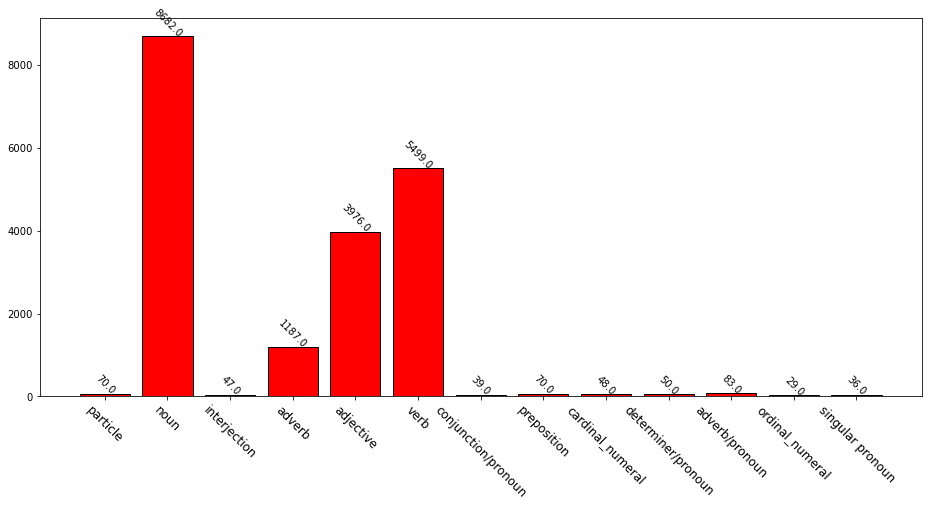

In [25]:
hist_plot(types_dict,saveName='grammatical_types',rotate=-45)

In [26]:
#----USEFUL!!!!----#
#print(*[ item[1] for itemy in [ *dict_array[0:,-1:1]]\
#                          for item in itemy if item[0] is None],sep='\n')
#print(*[ itemy for itemy in [ *dict_array[0:]]\
#       if itemy[2] is None],sep='\n')
diction_data = hist_data(list(diction))
baby_dictionairy_data = hist_data(list(baby_dictionairy))
print(len(baby_dictionairy))
#print(diction_data)

3550


<Figure size 432x288 with 0 Axes>

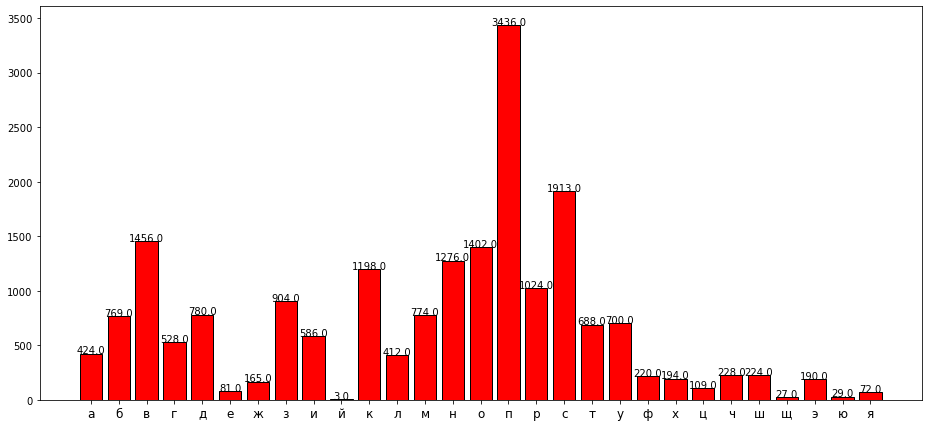

<Figure size 432x288 with 0 Axes>

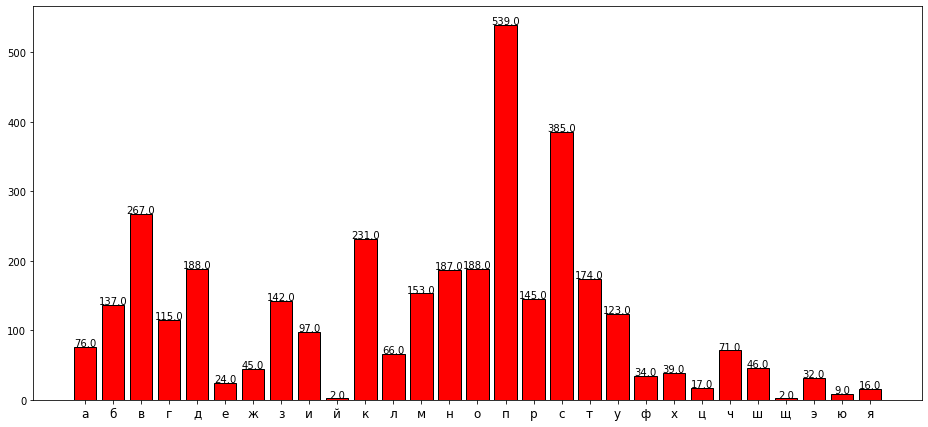

In [27]:
#%matplotlib tk
hist_plot(diction_data)
hist_plot(baby_dictionairy_data)

In [28]:
new_dict21, grammata1, grammata31 = hist_data2(list(diction))
new_dict22, grammata2, grammata32 = hist_data2(list(baby_dictionairy))

In [29]:
#print(*loweraddsort(list(diction)), sep = '\n')

In [30]:
big_dict1 = {}
for d in grammata31:
    big_dict1.update(d)
big_dict2 = {}
for d in grammata32:
    big_dict2.update(d)

<Figure size 432x288 with 0 Axes>

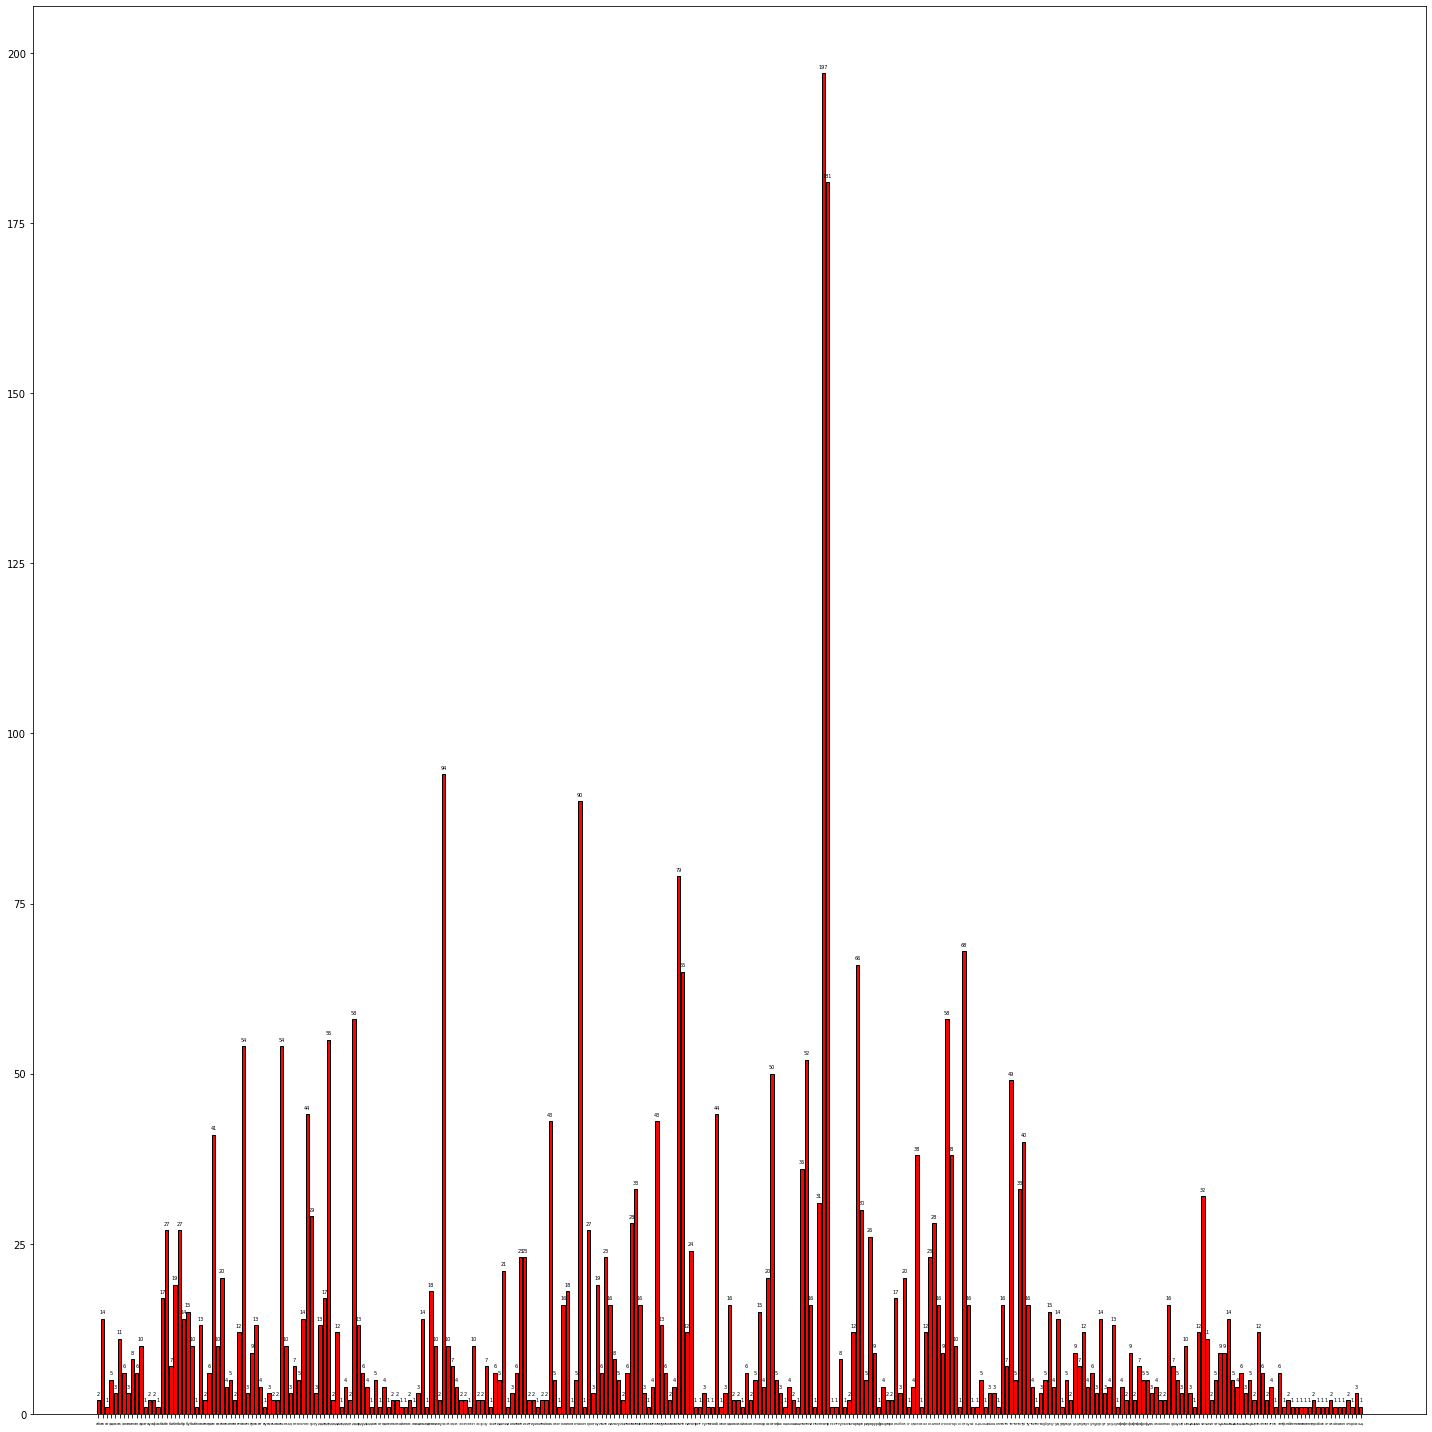

In [332]:
#hist_big(big_dict1)
hist_big(big_dict2)

In [42]:
#one liner list for print all words with the letter of want
print(*[(dicty) for dicty in loweraddsort(list(diction)) if dicty.startswith('коф') is True],sep = '\n' )
[(dicty) for dicty in loweraddsort(list(diction)) if dicty.startswith('коф') is True]

кофе
кофейный
кофейня
кофта
кофточка


['кофе', 'кофейный', 'кофейня', 'кофта', 'кофточка']

<Figure size 432x288 with 0 Axes>

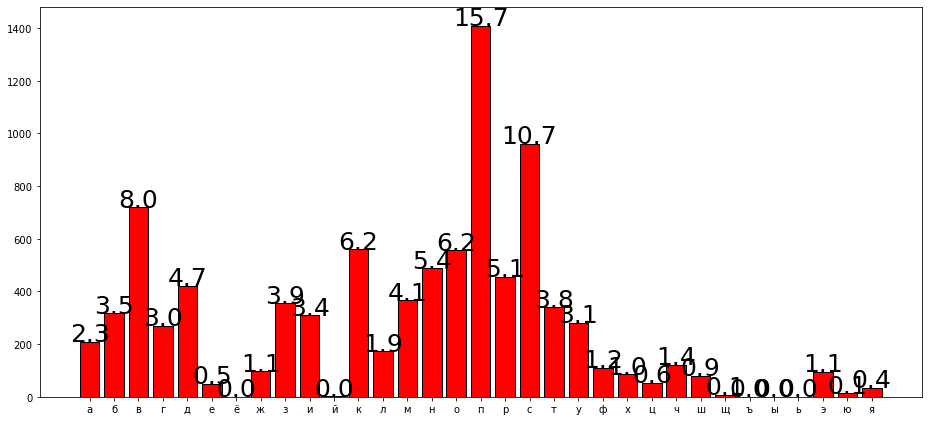

<Figure size 432x288 with 0 Axes>

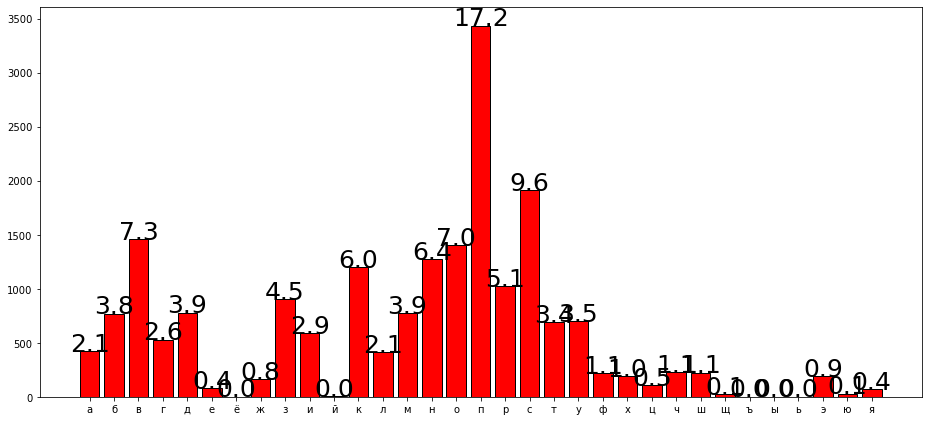

<Figure size 432x288 with 0 Axes>

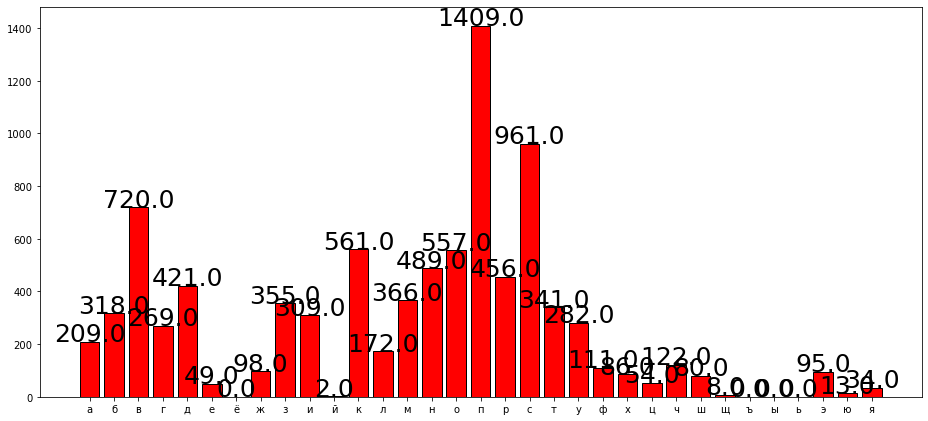

<Figure size 432x288 with 0 Axes>

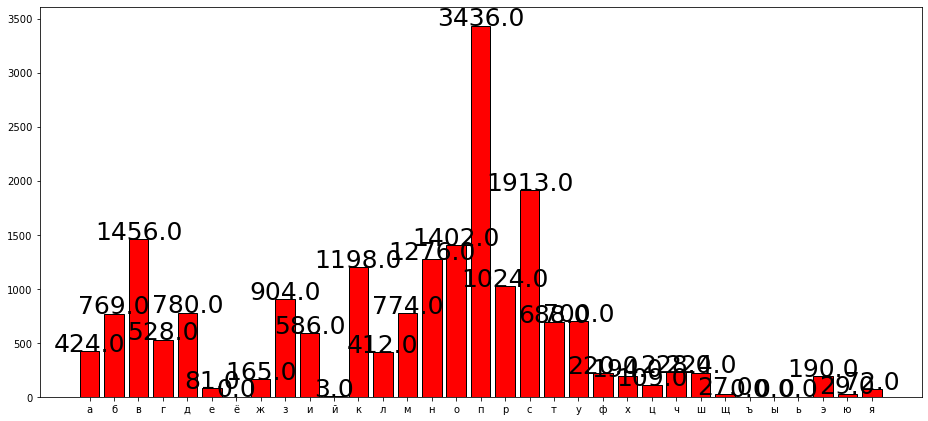

In [49]:
#%matplotlib tk
hist_plot(new_dict,a=90)
hist_plot(diction_data,a=200)
hist_plot(new_dict)
hist_plot(diction_data)

<Figure size 432x288 with 0 Axes>

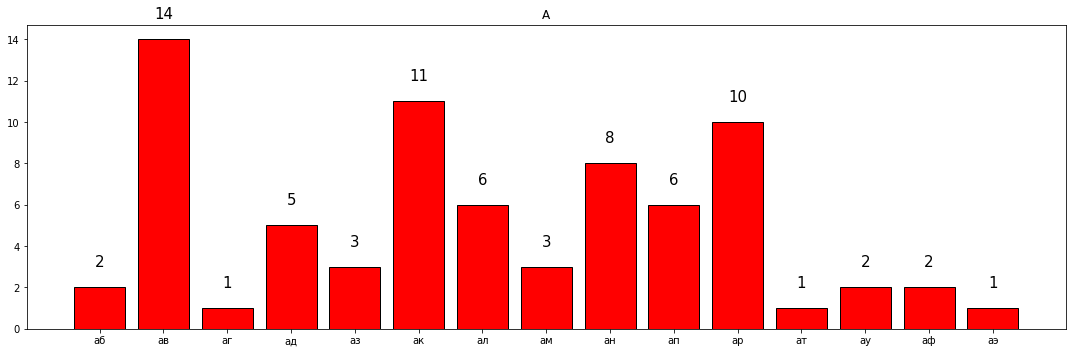

<Figure size 432x288 with 0 Axes>

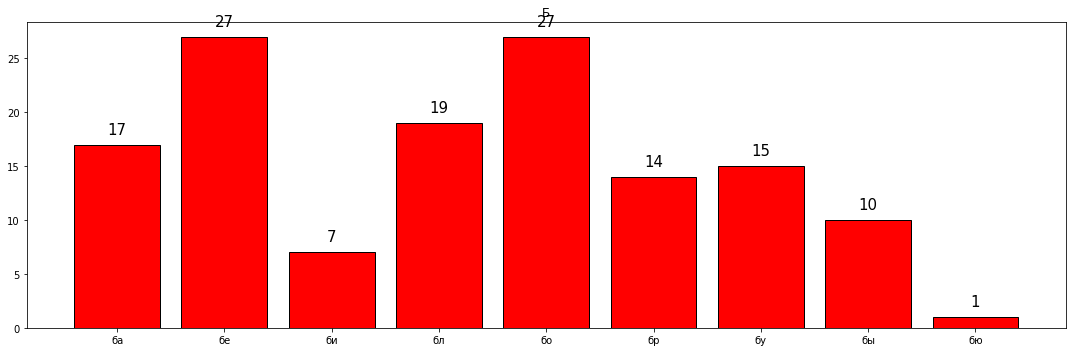

<Figure size 432x288 with 0 Axes>

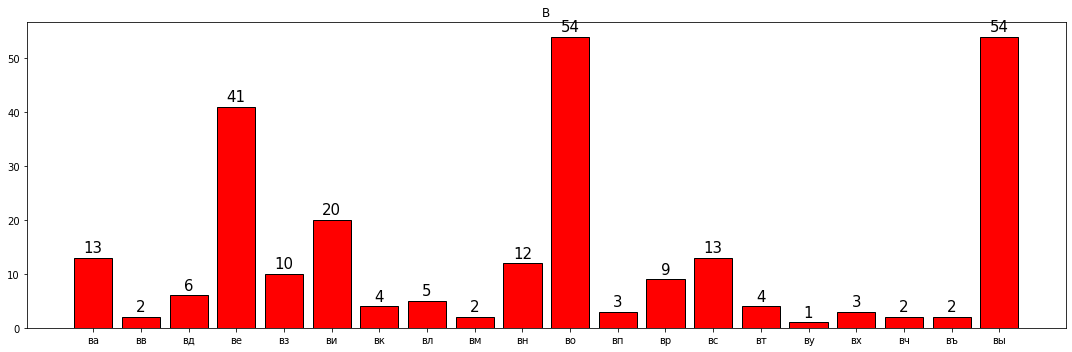

<Figure size 432x288 with 0 Axes>

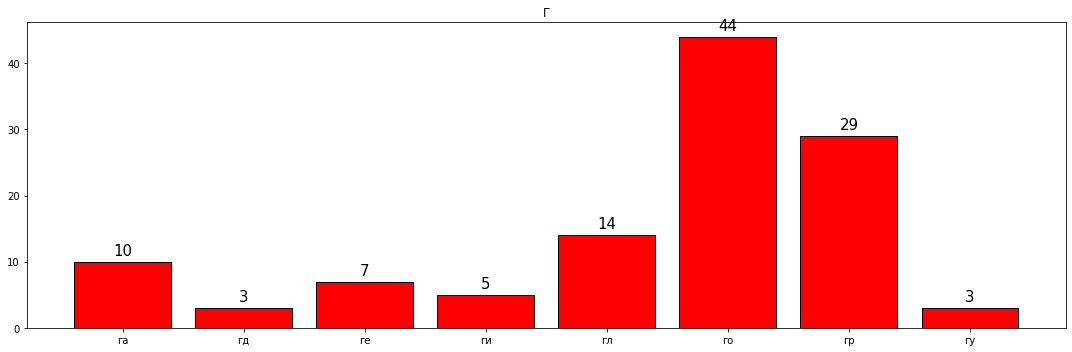

<Figure size 432x288 with 0 Axes>

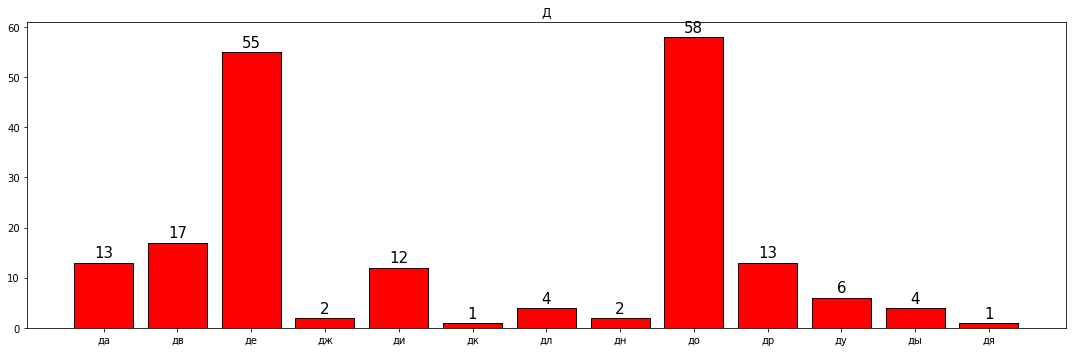

<Figure size 432x288 with 0 Axes>

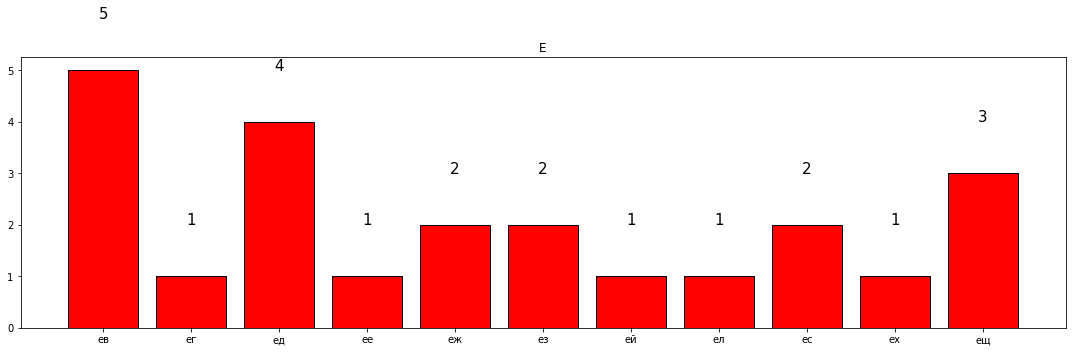

<Figure size 432x288 with 0 Axes>

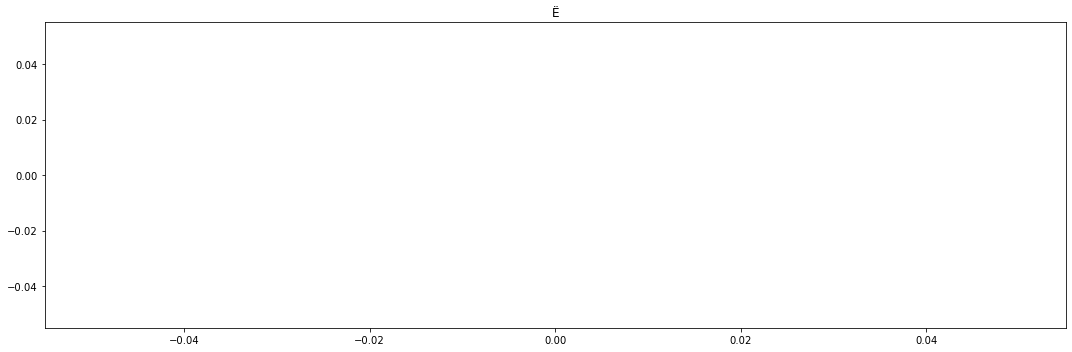

<Figure size 432x288 with 0 Axes>

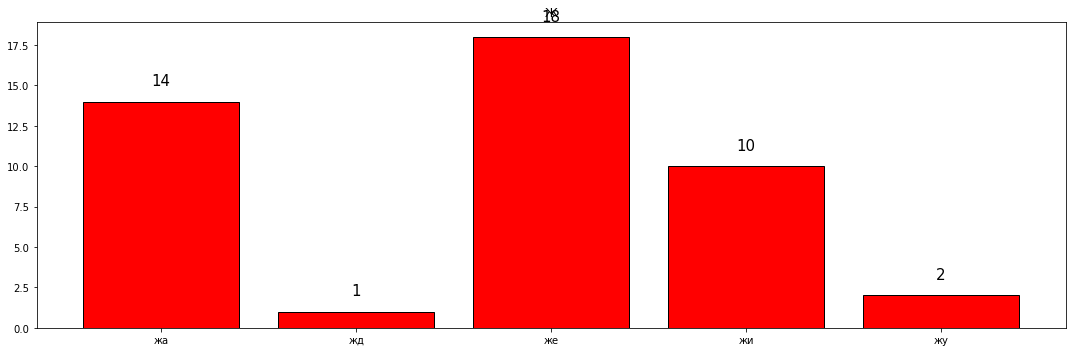

<Figure size 432x288 with 0 Axes>

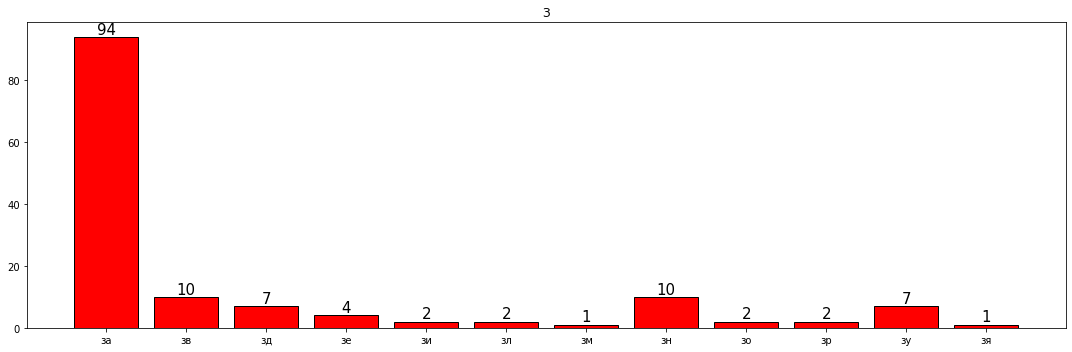

<Figure size 432x288 with 0 Axes>

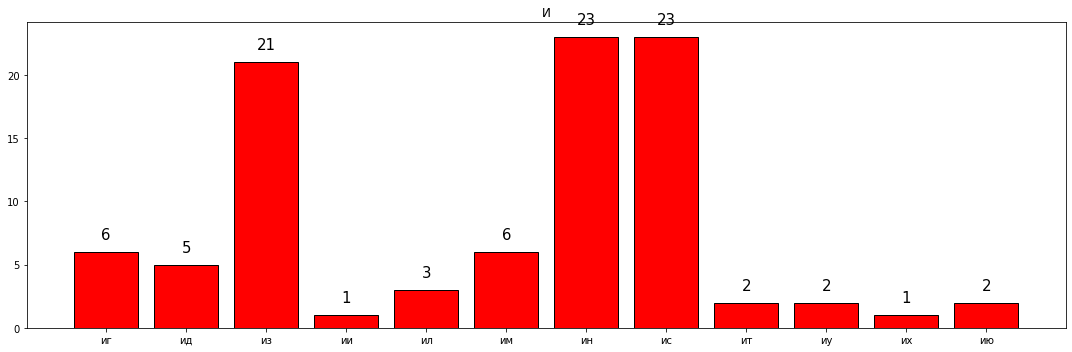

<Figure size 432x288 with 0 Axes>

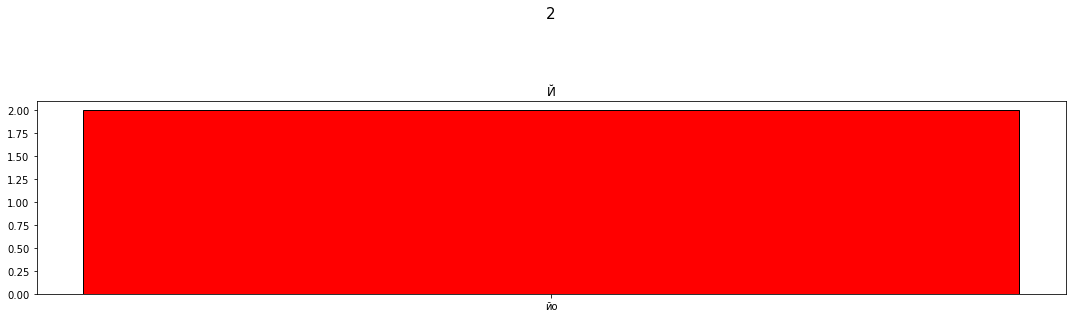

<Figure size 432x288 with 0 Axes>

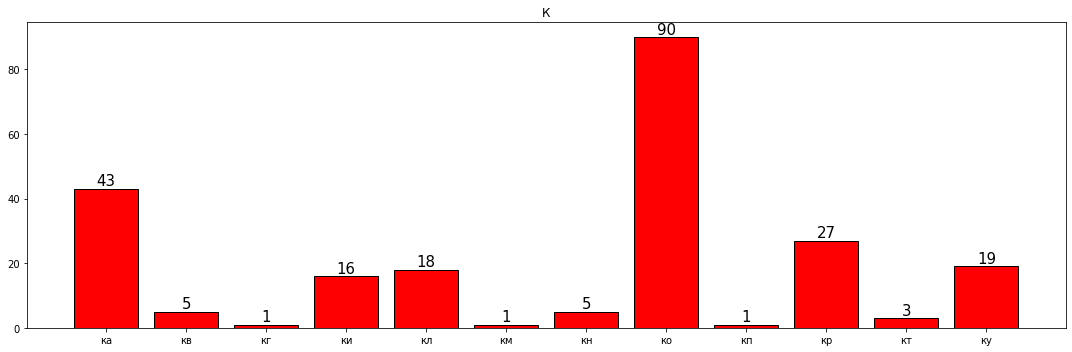

<Figure size 432x288 with 0 Axes>

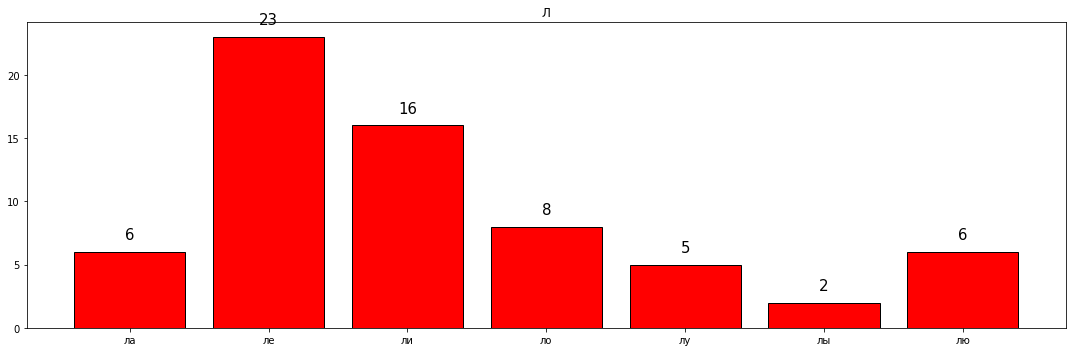

<Figure size 432x288 with 0 Axes>

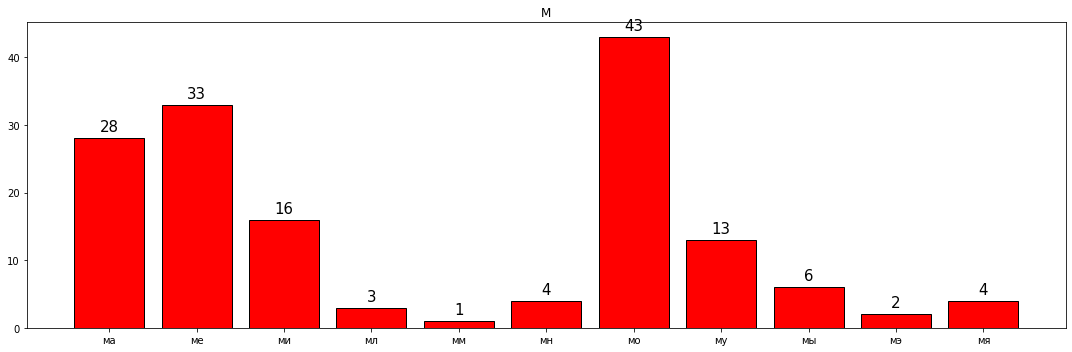

<Figure size 432x288 with 0 Axes>

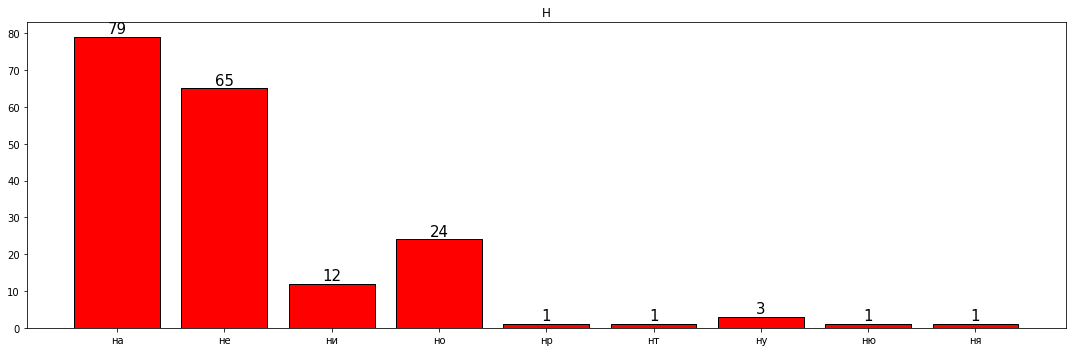

<Figure size 432x288 with 0 Axes>

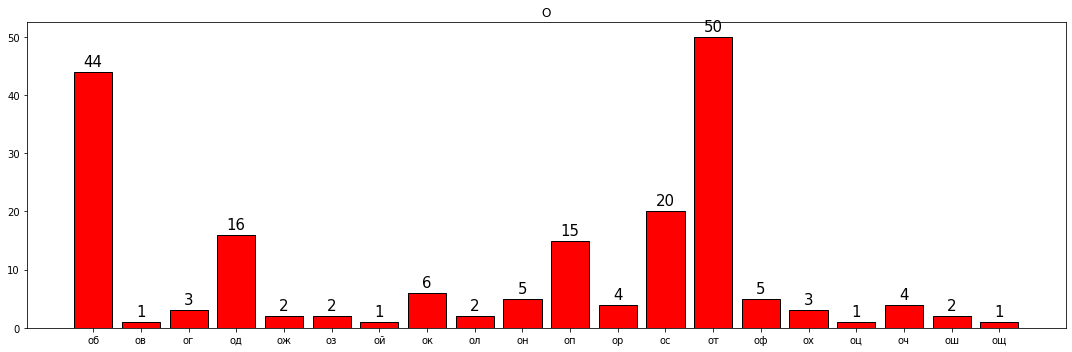

<Figure size 432x288 with 0 Axes>

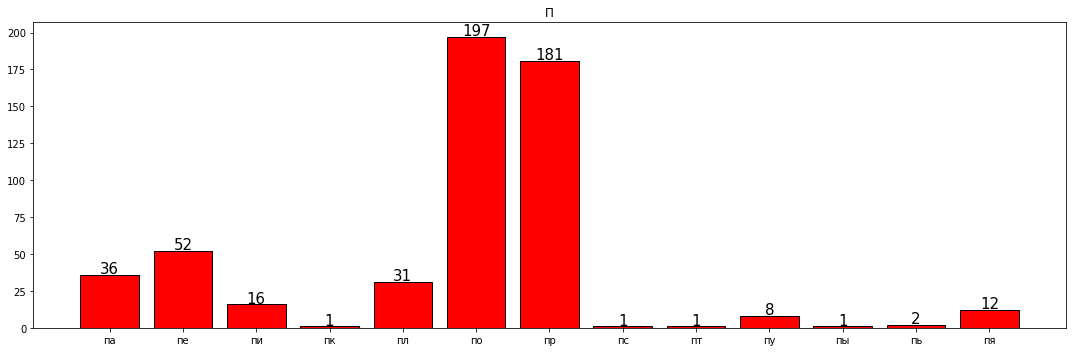

<Figure size 432x288 with 0 Axes>

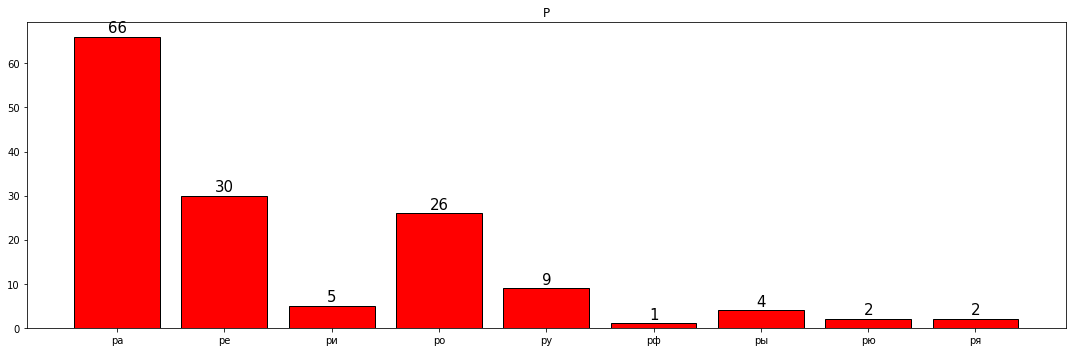

<Figure size 432x288 with 0 Axes>

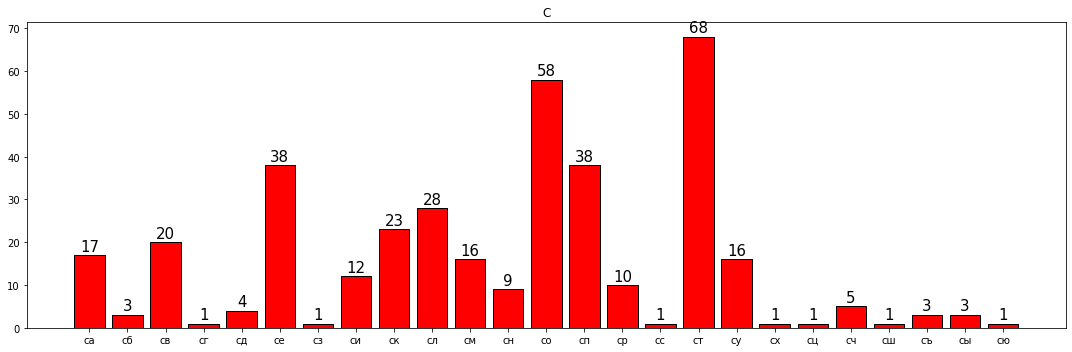

<Figure size 432x288 with 0 Axes>

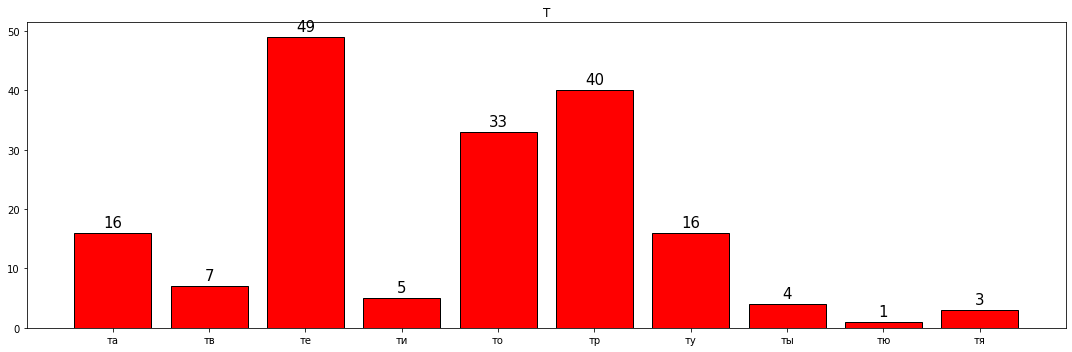

<Figure size 432x288 with 0 Axes>

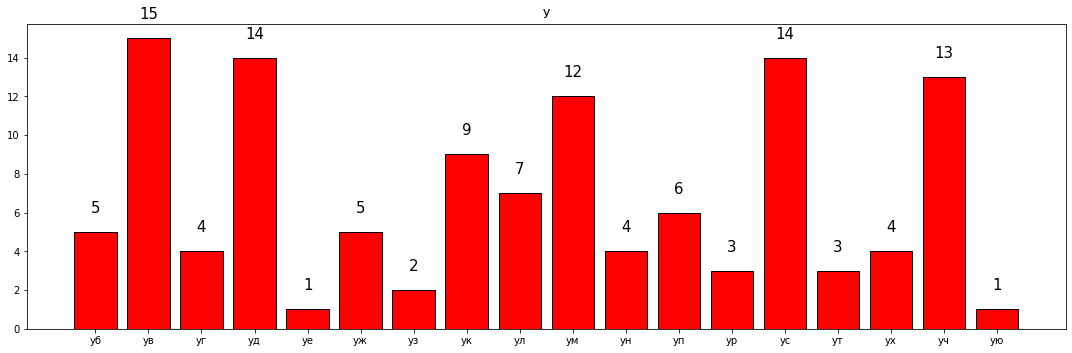

<Figure size 432x288 with 0 Axes>

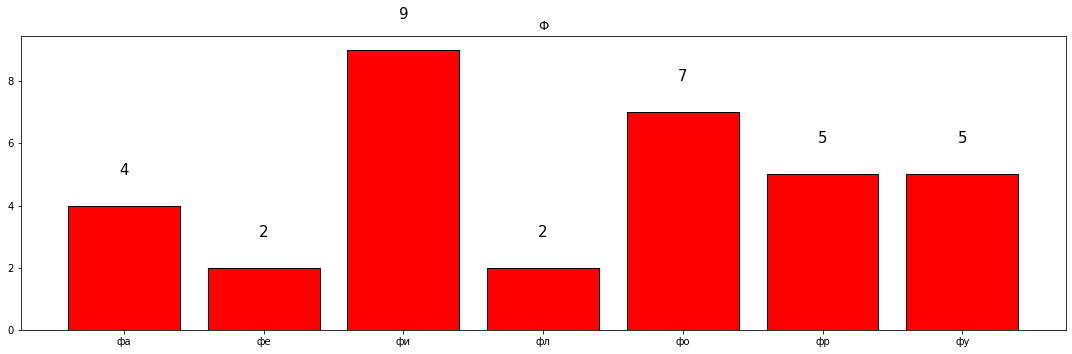

<Figure size 432x288 with 0 Axes>

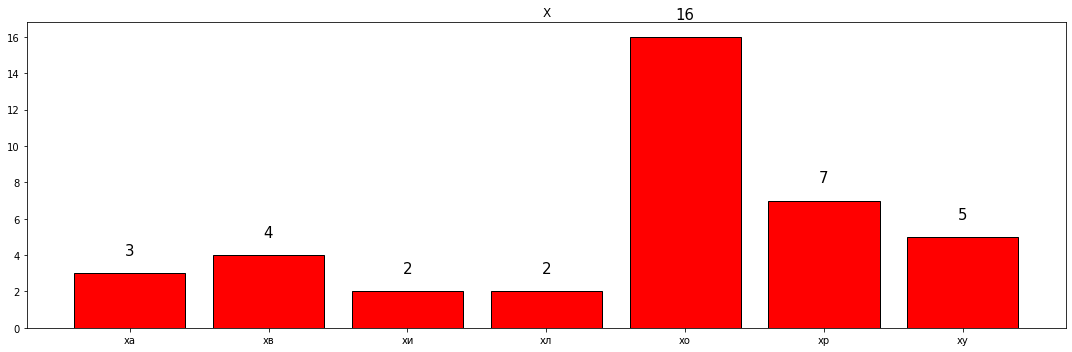

<Figure size 432x288 with 0 Axes>

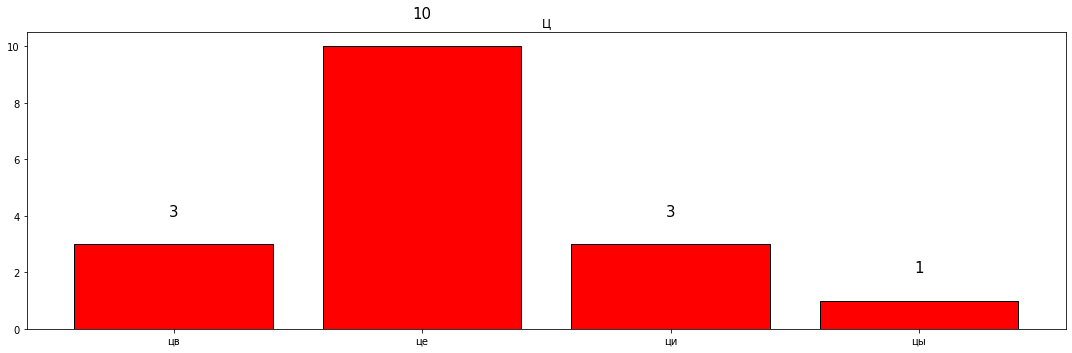

<Figure size 432x288 with 0 Axes>

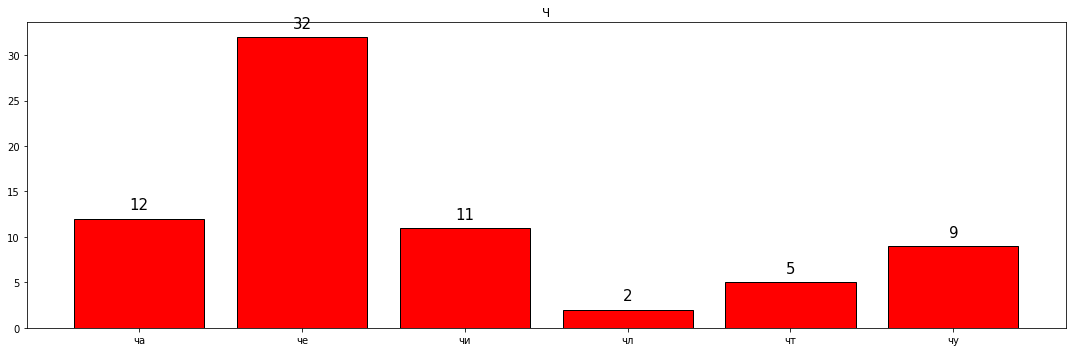

<Figure size 432x288 with 0 Axes>

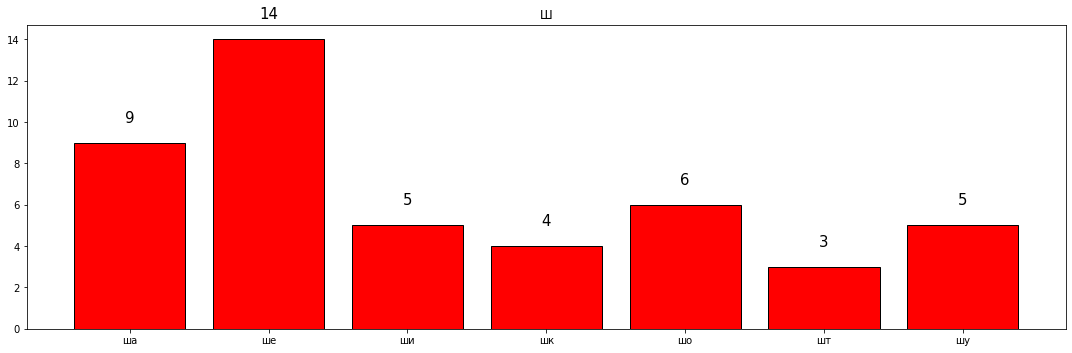

<Figure size 432x288 with 0 Axes>

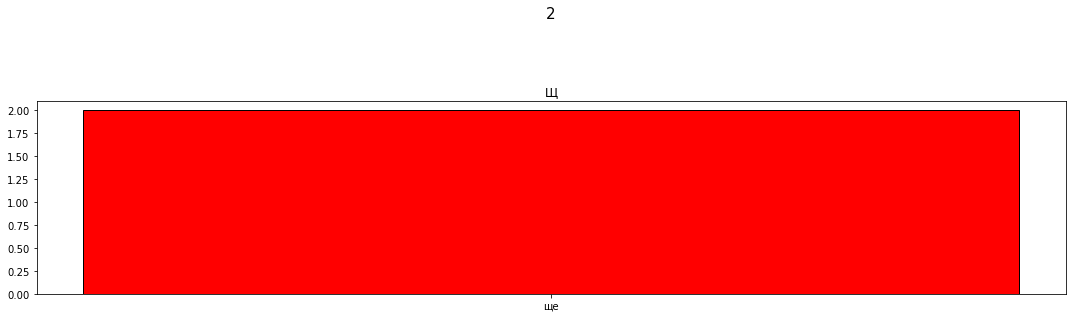

<Figure size 432x288 with 0 Axes>

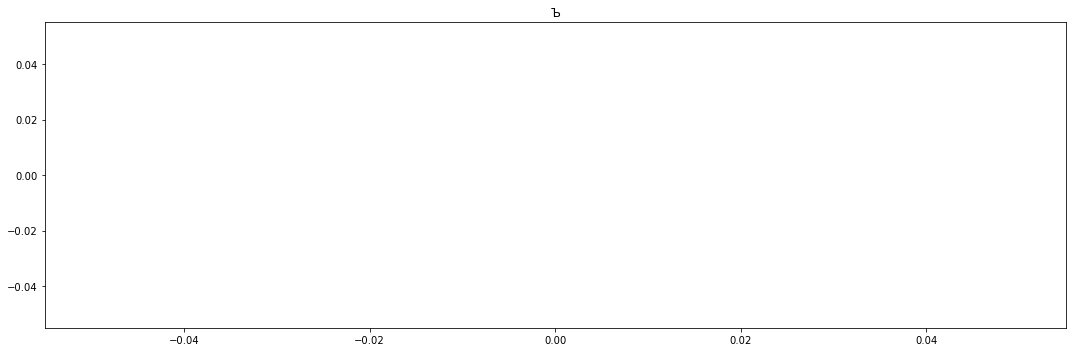

<Figure size 432x288 with 0 Axes>

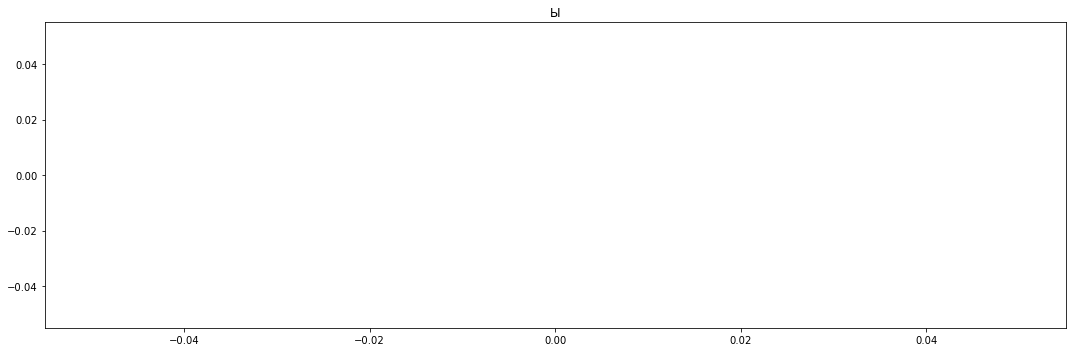

<Figure size 432x288 with 0 Axes>

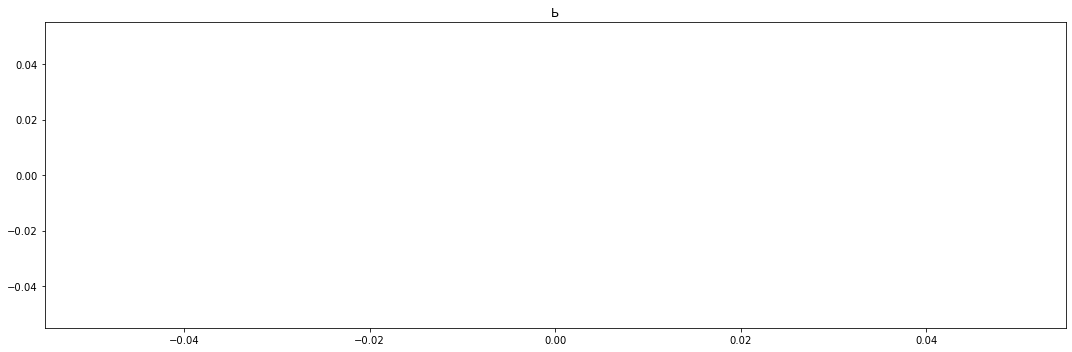

<Figure size 432x288 with 0 Axes>

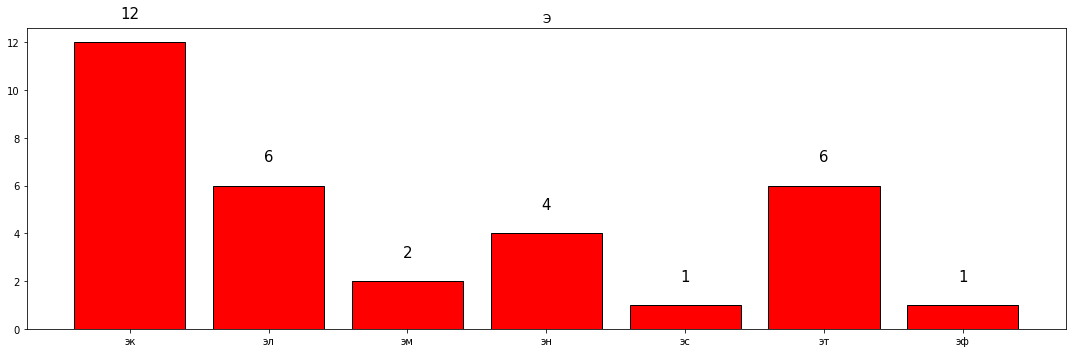

<Figure size 432x288 with 0 Axes>

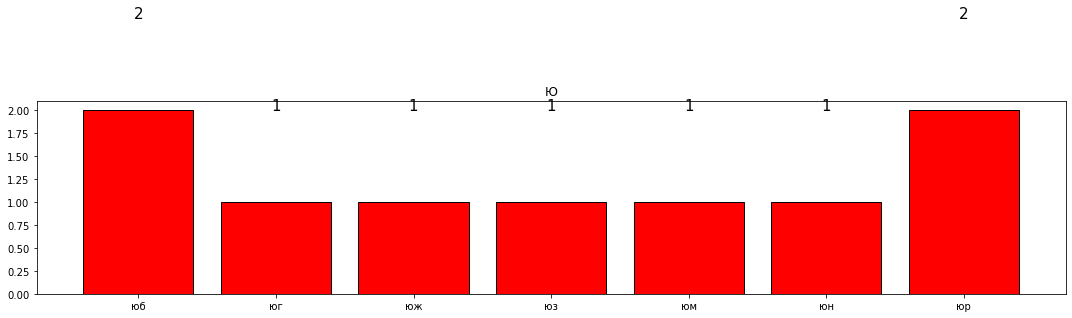

<Figure size 432x288 with 0 Axes>

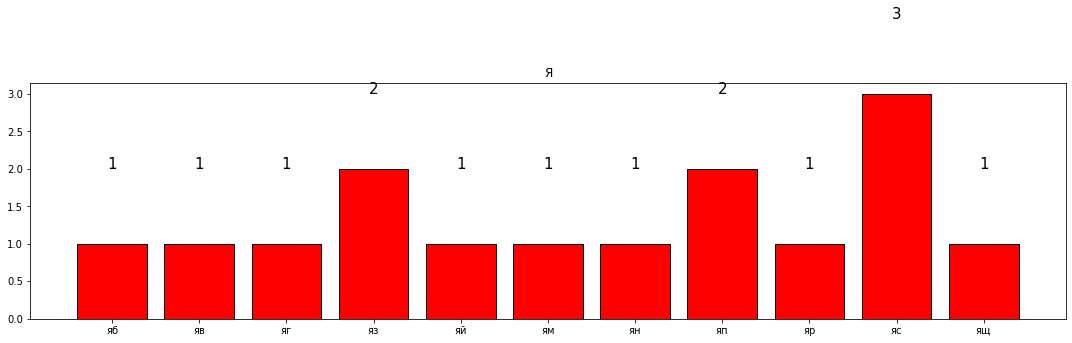

In [333]:
for gramy in range(0,33):
    plotty(gram=gramy,grammat3=grammata32)   

<Figure size 432x288 with 0 Axes>

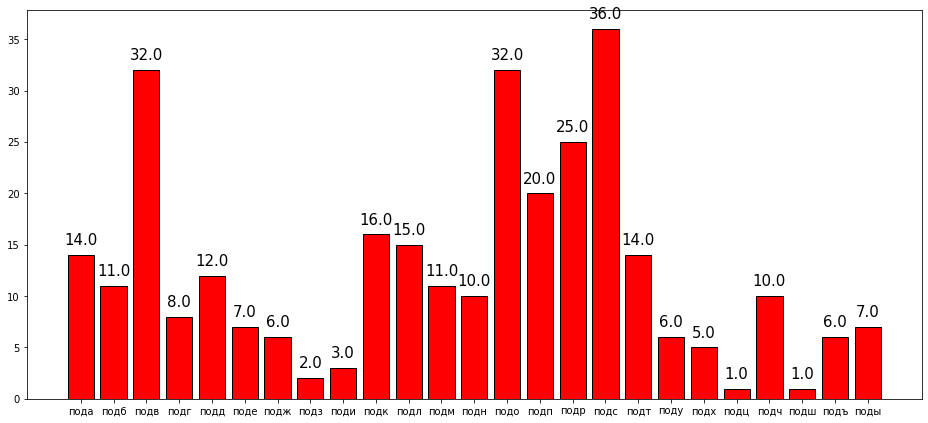

In [54]:
#one liner list for print all words with the letter of want
hist_plot(hist_data(diction,'под'))

<Figure size 432x288 with 0 Axes>

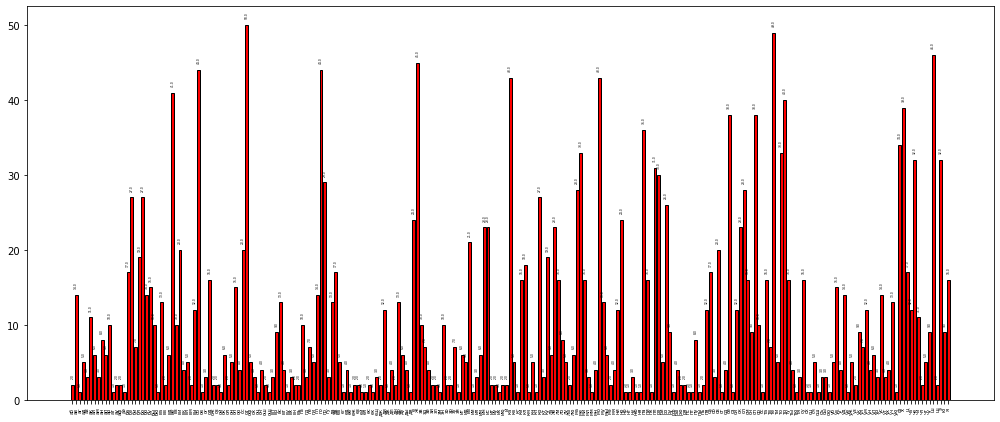

In [31]:
hist_plot(hist_data(baby_dictionairy,maxlimit=50),saveName='demo',sizing=3,figsize= (14,6),rotate=90)

In [1]:
liston = hist_data(diction,maxlimit=100)

NameError: name 'hist_data' is not defined

In [ ]:
print(*liston)